<a href="https://colab.research.google.com/github/anish170805/ML-Algos/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import itertools

warnings.filterwarnings('ignore')

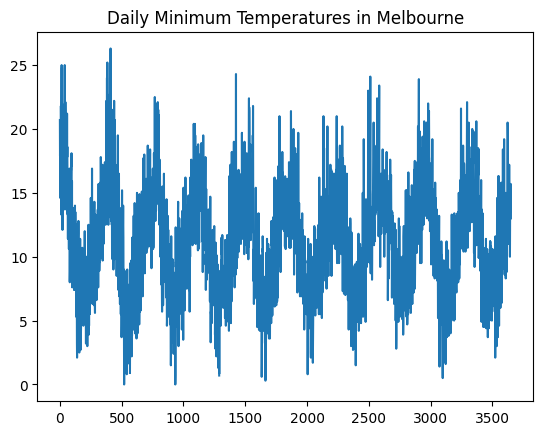

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/daily-min-temperatures.csv')
data['Temp'] = pd.to_numeric(data['Temp'], errors='coerce')
ts = data['Temp']

ts.plot(title='Daily Minimum Temperatures in Melbourne')
plt.show()

In [ ]:
ts = ts.dropna()
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] > 0.05:
    print("Series is non stationary; differencing is needed.")
else:
    print("Series is stationary; no differencing needed.")

ADF Statistic: -4.444653
p-value: 0.000247
Series is stationary; no differencing needed.


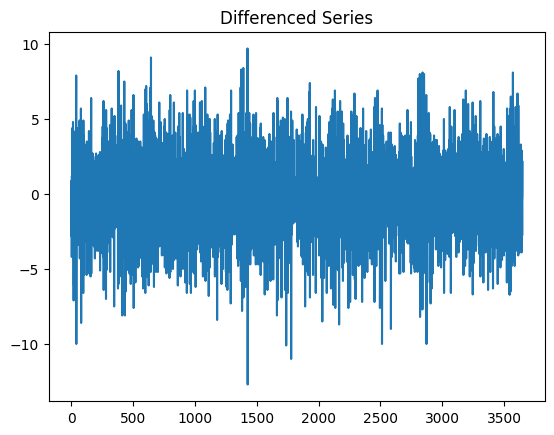

ADF Statistic (differenced): -21.079000
p-value (differenced): 0.000000


In [ ]:
ts_diff = ts.diff().dropna()

ts_diff.plot(title='Differenced Series')
plt.show()

result_diff = adfuller(ts_diff)
print('ADF Statistic (differenced): %f' % result_diff[0])
print('p-value (differenced): %f' % result_diff[1])

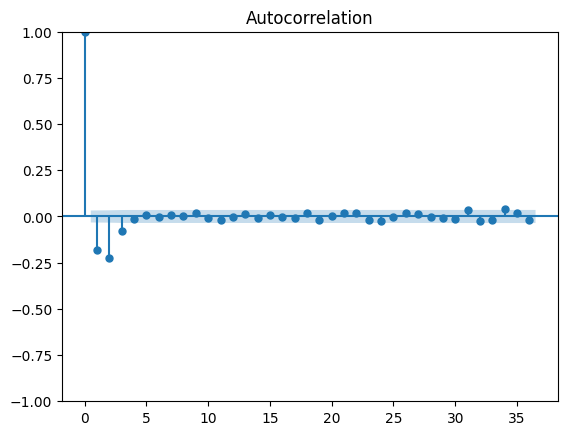

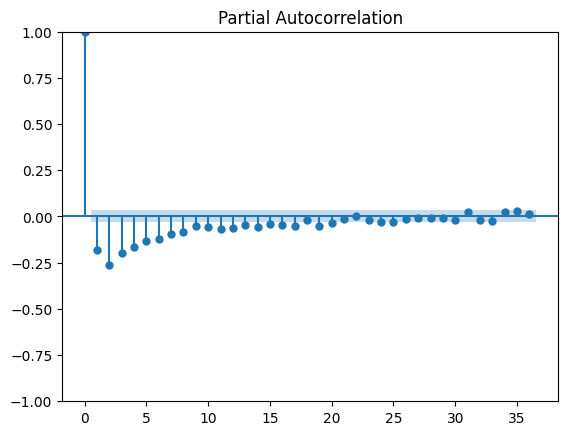

In [ ]:
plot_acf(ts_diff)
plt.show()

plot_pacf(ts_diff)
plt.show()

In [ ]:
p = range(0, 4)
d = range(0, 3)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_order = None
best_model = None

for order in pdq:
    try:
        model = ARIMA(ts, order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results
    except:
        continue

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')

Best ARIMA order: (3, 0, 1) with AIC: 16760.85769987077


In [ ]:
final_model = ARIMA(ts, order=best_order)
results = final_model.fit()

forecast_values = results.forecast(steps=10)

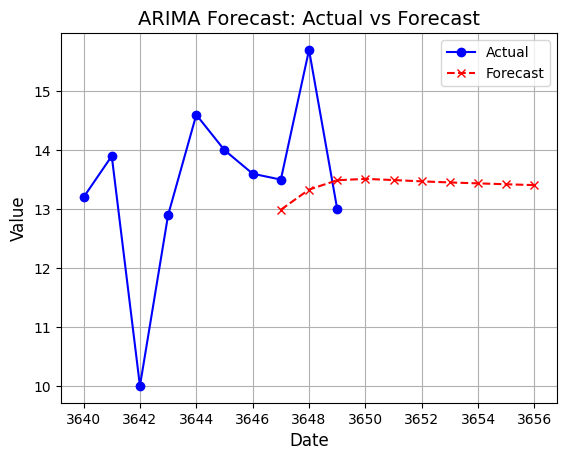

In [ ]:
plt.plot(ts[-10:].index, ts[-10:], label='Actual', color='blue', linestyle='-', marker='o')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red', linestyle='--', marker='x')

plt.title('ARIMA Forecast: Actual vs Forecast', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()